In [1]:
# PROCESS THE COMOVING STARS CATAOLOG:
# https://zenodo.org/records/4435257
# https://academic.oup.com/mnras/article/506/2/2269/6131876#
#
# ZACK REEVES
# CREATED: 2024
#
# VERSIONS:
#  1.1  JAN 2024 CREATE JUPYTER NOTEBOOK

In [53]:
# Define the metadata for the data set. 
metadata = {}

metadata['project'] = 'Digital Universe Atlas'
metadata['sub_project'] = 'Comoving Stars'

metadata['catalog'] = 'A million binaries from Gaia eDR3: sample selection and validation of Gaia parallax uncertainties (El-Badry+, 2021)'
metadata['catalog_author'] = 'El-Badry+'
metadata['catalog_year'] = '2021'
metadata['catalog_doi'] = 'https://doi.org/10.1093/mnras/stab323'
metadata['catalog_bibcode'] = '2021MNRAS.506.2269E'


metadata['prepared_by'] = 'Zack Reeves (AMNH)'
metadata['version'] = '1.1'

metadata['dir'] = metadata['sub_project'].replace(' ', '_').lower()
metadata['raw_data_dir'] = ''

metadata['data_group_title'] = 'ComovingStars'
metadata['data_group_desc'] = 'Comoving Star catalog'
metadata['data_group_desc_long'] = 'Comoving Star catalog'
metadata['fileroot'] = 'comov'

file_functions.generate_license_file(metadata)
file_functions.generate_asset_file(metadata)

In [23]:
import pandas as pd
import numpy as np
import sys
import collections

from matplotlib import pyplot as plt, colors

from astroquery.gaia import Gaia
from astroquery.utils.tap.core import TapPlus

from astropy.io import fits
import astropy.table as table
from astropy.table import Table, vstack

sys.path.insert(0, '..')
from common import file_functions, calculations, gaia_functions

In [ ]:
#running code with -i allows us to run the .py files in the same namespace as our .ipynb
%run -i el_badry_query.py

In [ ]:
data = Table.read('raw_data/1719240801275O-result.vot.gz')
data.write('raw_data/edr3_parallax_snr5_goodG.csv')

In [ ]:
#running code with -i allows us to run the .py files in the same namespace as our .ipynb
%run -i num_neighbors_edr3.py

In [ ]:
%run -i find_binaries_edr3.py

In [ ]:
import find_binaries_edr3

In [5]:
binaries = Table.read('raw_data/all_columns_catalog.fits.gz')
binaries.columns

<TableColumns names=('solution_id1','solution_id2','source_id1','source_id2','random_index1','random_index2','ref_epoch1','ref_epoch2','ra1','ra2','ra_error1','ra_error2','dec1','dec2','dec_error1','dec_error2','parallax1','parallax2','parallax_error1','parallax_error2','parallax_over_error1','parallax_over_error2','pm1','pm2','pmra1','pmra2','pmra_error1','pmra_error2','pmdec1','pmdec2','pmdec_error1','pmdec_error2','ra_dec_corr1','ra_dec_corr2','ra_parallax_corr1','ra_parallax_corr2','ra_pmra_corr1','ra_pmra_corr2','ra_pmdec_corr1','ra_pmdec_corr2','dec_parallax_corr1','dec_parallax_corr2','dec_pmra_corr1','dec_pmra_corr2','dec_pmdec_corr1','dec_pmdec_corr2','parallax_pmra_corr1','parallax_pmra_corr2','parallax_pmdec_corr1','parallax_pmdec_corr2','pmra_pmdec_corr1','pmra_pmdec_corr2','astrometric_n_obs_al1','astrometric_n_obs_al2','astrometric_n_obs_ac1','astrometric_n_obs_ac2','astrometric_n_good_obs_al1','astrometric_n_good_obs_al2','astrometric_n_bad_obs_al1','astrometric_n_bad_ob

In [9]:
binaries = binaries[['source_id1', 'source_id2', 'ra1', 'ra2', 'dec1', 'dec2', 'parallax1', 'parallax2', 'parallax_error1', 'parallax_error2', 'pmra1', 'pmra2', 'pmdec1', 'pmdec2', 'dr2_radial_velocity1', 'dr2_radial_velocity2', 'phot_g_mean_mag1', 'phot_g_mean_mag2', 'bp_rp1', 'bp_rp2']]

In [ ]:
#binaries = Table.read('raw_data/all_columns_catalog.fits.gz')[['source_id1', 'source_id2', 'ra1', 'ra2', 'dec1', 'dec2', 'parallax1', 'parallax2', 'parallax_error1', 'parallax_error2', 'pmra1', 'pmra2', 'pmdec1', 'pmdec2', 'dr2_radial_velocity1', 'dr2_radial_velocity2', 'phot_g_mean_mag1', 'phot_g_mean_mag2', 'bp_rp1', 'bp_rp2']]

In [ ]:
binaries

In [26]:
data_1 = binaries[['source_id1', 'ra1', 'dec1', 'parallax1', 'parallax_error1', 'pmra1', 'pmdec1', 'dr2_radial_velocity1', 'phot_g_mean_mag1', 'bp_rp1']]

In [27]:
data_2 = binaries[['source_id2', 'ra2', 'dec2', 'parallax2', 'parallax_error2', 'pmra2', 'pmdec2', 'dr2_radial_velocity2', 'phot_g_mean_mag2', 'bp_rp2']]

In [28]:
data_1.rename_columns(['source_id1', 'ra1', 'dec1', 'parallax1', 'parallax_error1', 'pmra1', 'pmdec1', 'dr2_radial_velocity1', 'phot_g_mean_mag1', 'bp_rp1'], ['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'dr2_radial_velocity', 'phot_g_mean_mag', 'bp_rp']),
data_2.rename_columns(['source_id2', 'ra2', 'dec2', 'parallax2', 'parallax_error2', 'pmra2', 'pmdec2', 'dr2_radial_velocity2', 'phot_g_mean_mag2', 'bp_rp2'], ['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'dr2_radial_velocity', 'phot_g_mean_mag', 'bp_rp'])

In [29]:
data_1['binary_index']=[str(i)+'_1' for i in range(len(binaries))]
data_2['binary_index']=[str(i)+'_2' for i in range(len(binaries))]

In [30]:
data = vstack([data_1, data_2])

In [31]:
data

<Table length=3635188>
     source_id              ra         ...   bp_rp    binary_index
                           deg         ...    mag                 
       int64             float64       ...  float32       str9    
------------------- ------------------ ... ---------- ------------
4282339100022417152 282.80943113005753 ...  1.2012444          0_1
4089436931798712576 276.31365516286564 ...  2.0625582          1_1
4282722760856124416  283.2152167318123 ...  2.2041664          2_1
4128188325747199104 256.87034730707893 ... 0.46109104          3_1
4281789722159307520 285.41625509993867 ...   2.278595          4_1
4282724650641727872  283.2227851522741 ...   2.360032          5_1
4282965924725362688 278.80555562237925 ...  2.4601746          6_1
4282725887591623296  283.1393441633273 ...  1.3664894          7_1
4281793158132967040 285.39141510861276 ...  1.3655415          8_1
                ...                ... ...        ...          ...
6056100188846661248 195.85362436676726 ...      1e+20    1817584_2
6056100807322105728 195.97334677235068 ...    2.89225    1817585_2
6056286693539190912  189.5852017397337 ...  2.0301409    1817586_2
6056103521779670656  196.3448942589162 ...  1.5337276    1817587_2
6056104140218598656  196.5253439679154 ...      1e+20    1817588_2
6056104346377117824  196.4418838179628 ...      1e+20    1817589_2
6056106476680697344 196.17600080193557 ...  2.2392063    1817590_2
6056106923357411840  196.1462679381462 ...      1e+20    1817591_2
6056106992113048960 196.11664550541246 ...  1.2147732    1817592_2
6056109088057213312 196.33373208041763 ...  1.6696873    1817593_2

In [32]:
#calculating distance in light years and parsecs
calculations.get_distance(data, parallax='parallax', use='parallax')

In [33]:
#calculating cartesian coordinates
calculations.get_cartesian(data, ra='ra', dec='dec', pmra='pmra', pmde='pmdec', radial_velocity='dr2_radial_velocity', frame='icrs')

<function matplotlib.pyplot.show(close=None, block=None)>

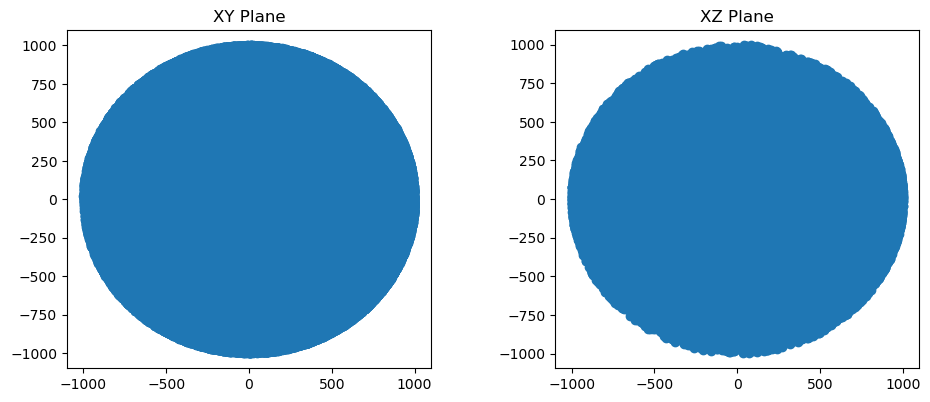

In [42]:
#2D Visualization
fig, ax = plt.subplots(1, 2)

#XY Plane
ax[0].scatter(data['x'], data['y'])
ax[0].set_title('XY Plane')

#XZ Plane
ax[1].scatter(data['x'], data['z'])
ax[1].set_title('XZ Plane')

#set good spacing
fig.tight_layout()
fig.set_size_inches(10, 4, forward=True)
plt.show

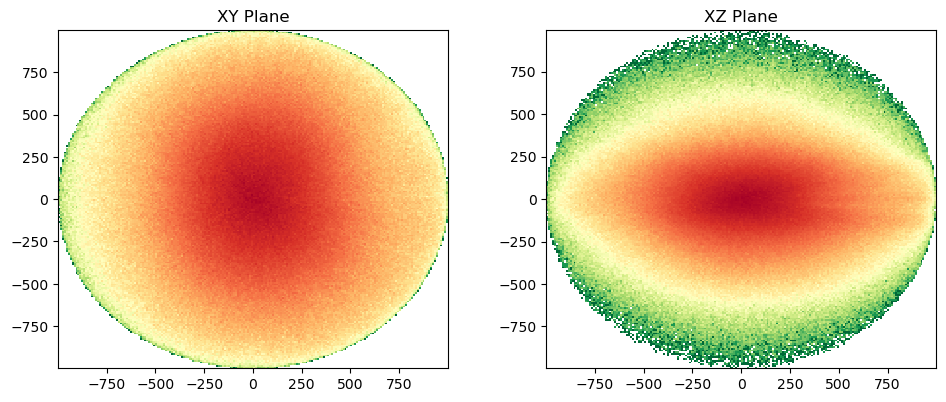

In [43]:
#2D Density Visualization
fig, ax = plt.subplots(1, 2)

#XY Plane
ax[0].hist2d(data['x'], data['y'], 
           bins = 200,  
           norm = colors.LogNorm(),  
           cmap = "RdYlGn_r",) 
ax[0].set_title('XY Plane')

#XZ Plane
ax[1].hist2d(data['x'], data['z'], 
           bins = 200,  
           norm = colors.LogNorm(),  
           cmap = "RdYlGn_r",) 
ax[1].set_title('XZ Plane')

#set good spacing
fig.tight_layout()
fig.set_size_inches(10, 4, forward=True)
#plt.show

In [49]:
data['error_over_parallax']=[data['parallax_error'][i]/data['parallax'][i] for i in range(len(data))]

In [51]:
len(data[data['error_over_parallax']>0.15])

463821

In [34]:
gaia_functions.get_magnitudes(data)
gaia_functions.get_luminosity(data)
gaia_functions.get_bp_g_color(data, color='bp_rp')

In [35]:
#construct a speck comment column
data['speck_label'] = data.Column(data=['#__'+str(name) for name in data['source_id']], 
                                  meta=collections.OrderedDict([('ucd', 'meta.id')]),
                                  description='Gaia EDR3 Source ID')

#construct a label column
data['label'] = ['GaiaEDR3_'+ str(source) for source in data['source_id']]  #leaving for now in case we want to add other labels

In [37]:
#setting texture number column
data['texnum'] = data.Column(data=[1]*len(data), 
                                  meta=collections.OrderedDict([('ucd', 'meta.texnum')]),
                                  description='Texture Number')

In [39]:
#setting metadata for dcalc
data['dcalc'] = data.Column([3]*len(data),
                            meta=collections.OrderedDict([('ucd', 'meta.dcalc')]),
                            description='Distance Indicator: 1 indicates a Bailer-Jones photogeometric distance; 2 indicates a Bailer-Jones geometric distance; 3 indicates a Gaia parallax-based distance')


In [40]:
#Getting the column metadata
columns = file_functions.get_metadata(data, columns=['x', 'y', 'z', 'color', 'lum', 'absmag', 'appmag', 'texnum', 'dist_ly', 'dcalc', 'u', 'v', 'w', 'speed', 'speck_label'])
columns

name    unit datatype width precision arraysize  \
0             x      pc  float64               6             
1             y      pc  float64               6             
2             z      pc  float64               6             
3         color  solLum  float32               2             
4           lum  solLum  float64               6             
5        absmag     mag  float64               6             
6        appmag     mag  float32               6             
7        texnum            int32                             
8       dist_ly     lyr  float64               1             
9         dcalc            int32                             
10            u  km / s  float64               6             
11            v  km / s  float64               6             
12            w  km / s  float64               6             
13        speed          float64               6             
14  speck_label              str                         *   

                     ucd                                        description  
0        pos.cartesian.x  x position (galactic cartesian coordinates) in...  
1        pos.cartesian.y                 Position (y coordinate) in parsecs  
2        pos.cartesian.z                 Position (z coordinate) in parsecs  
3             phys.color                                    Gaia BP-G color  
4        phys.luminosity                                 Stellar Luminosity  
5   phot.magAbs;em.opt.G                  Absolute magnitude in Gaia G-band  
6      phot.mag;em.opt.G                  Apparent magnitude in Gaia G-band  
7            meta.texnum                                     Texture Number  
8           pos.distance                            Distance from Sun (lyr)  
9             meta.dcalc  Distance Indicator: 1 indicates a Bailer-Jones...  
10       vel.cartesian.u      Heliocentric velocity towards Galactic Center  
11       vel.cartesian.v    Heliocentric velocity towards Galactic Rotation  
12       vel.cartesian.w  Heliocentric velocity towards Galactic North Pole  
13             vel.speed                        Total heliocentric velocity  
14               meta.id                                Gaia EDR3 Source ID

In [45]:
# Print the speck file using the to_speck function in file_functions
file_functions.to_speck(metadata, Table.to_pandas(data), columns)

In [46]:
# Print the label file using the to_label function in file_functions
file_functions.to_label(metadata, Table.to_pandas(data))

In [52]:
# Print the csv file using the to_csv function in file_functions
file_functions.to_csv(metadata, Table.to_pandas(data), columns)